<a href="https://colab.research.google.com/github/nandibula03/Email_Spam_Detection/blob/master/Email_smam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [31]:
df = pd.read_csv('emails.csv',encoding='latin-1')

In [32]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [33]:
df.drop_duplicates(inplace = True)

In [34]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [39]:
df['label'] = df['spam'].map( {1: 'spam', 0:'ham'} ).astype(str)d

In [44]:
type(df['text'])

pandas.core.series.Series

In [48]:
df['text']=df['text'].str.replace('Subject:',' ')

In [52]:
df['text']=df['text'].str.replace('re :',' ')

In [53]:
df

,text,spam,label
0,naturally irresistible your corporate identi...,1,spam
1,the stock trading gunslinger fanny is merri...,1,spam
2,unbelievable new homes made easy im wanting...,1,spam
3,4 color printing special request additional...,1,spam
4,"do not have money , get software cds from he...",1,spam
...,...,...,...
5723,research and development charges to gpg h...,0,ham
5724,"receipts from visit jim , thanks again f...",0,ham
5725,enron case study update wow ! all on the ...,0,ham
5726,"interest david , please , call shirley c...",0,ham


In [54]:
df['length'] = df['text'].apply(len)

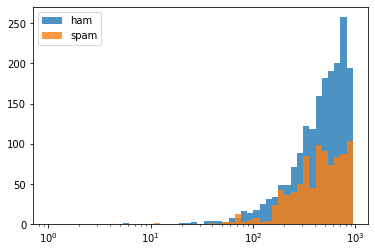

In [55]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins= bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins= bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# x is feature data
x = df['text']
# y  label data
y= df['label']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

x_train_tfidf = vectorizer.fit_transform(x_train) # remember to use the original x_train set
x_train_tfidf.shape

(3986, 31927)

In [59]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(x_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [60]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(x_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [61]:
# Form a prediction set
p = text_clf.predict(x_test)

In [62]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,p))

[[1267    2]
 [  10  430]]


In [63]:
# Print a classification report
print(metrics.classification_report(y_test,p))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1269
        spam       1.00      0.98      0.99       440

    accuracy                           0.99      1709
   macro avg       0.99      0.99      0.99      1709
weighted avg       0.99      0.99      0.99      1709



In [64]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,p))

0.9929783499122293


In [71]:
text_clf.predict(['Congratulations to our Winners:Caitlin O. of New Bedford, Massachusetts,Brigid M. of Marblehead, Massachusetts'])

array(['ham'], dtype=object)

In [72]:
text_clf.predict(['IMPORTANT INFORMATION:The new domain names are finally available to the general public at discount prices. Now you can register one of the exciting new .BIZ or .INFO domain names, as well as the original .COM and .NET names for just $14.95. These brand new domain extensions were recently approved by ICANN and have the same rights as the original '])

array(['spam'], dtype=object)

In [73]:
text_clf.predict(['Hello Friends! We hope you had a pleasant week. Last weeks trivia questions was:What do these 3 films have in common: One Crazy Summer, Whispers in the = Dark, Moby Dick?=20'])

array(['ham'], dtype=object)